In [1]:
#import libraries

import numpy as np
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from IPython.display import display
from collections import Counter

%matplotlib inline

In [2]:
#Read Data & remove duplicates if any

hallowen_candy = gpd.read_file('../data/state-by-state-favorite-halloween-candy.geojson')
hallowen_candy.drop_duplicates(inplace=True)
hallowen_candy.head(3)

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry
0,Florida,Reese's Peanut Butter Cups,543529,FL,Snickers,194117,Skittles,660000,"MULTIPOLYGON (((-82.98339 24.60263, -82.98624 ..."
1,Kansas,Dubble Bubble Gum,210375,KS,Reese's Peanut Butter Cups,111375,M&M's,247500,"POLYGON ((-102.04521 38.69757, -102.04521 38.7..."
2,New York,Reese's Peanut Butter Cups,95047,NY,Candy Corn,39603,Sour Patch Kids,198016,"MULTIPOLYGON (((-74.04657 40.68964, -74.04675 ..."


In [3]:
#Create a new column "total_pounds" to show the combined weight of 1st, 2nd, and 3rd place candies consumed by each state.

hallowen_candy['total_pounds'] = hallowen_candy['top_candy_pounds'] + hallowen_candy['2nd_place_pounds'] + hallowen_candy['3rd_place_pounds']
hallowen_candy.head(3)

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds
0,Florida,Reese's Peanut Butter Cups,543529,FL,Snickers,194117,Skittles,660000,"MULTIPOLYGON (((-82.98339 24.60263, -82.98624 ...",1397646
1,Kansas,Dubble Bubble Gum,210375,KS,Reese's Peanut Butter Cups,111375,M&M's,247500,"POLYGON ((-102.04521 38.69757, -102.04521 38.7...",569250
2,New York,Reese's Peanut Butter Cups,95047,NY,Candy Corn,39603,Sour Patch Kids,198016,"MULTIPOLYGON (((-74.04657 40.68964, -74.04675 ...",332666


In [4]:
#Which state consumes the most of its 1st, 2nd, and 3rd place candies combined (greatest combined weight)?

hallowen_candy = hallowen_candy.sort_values(by = 'total_pounds', ascending = False)
hallowen_candy.head(1)

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds
4,California,Skittles,1188000,CA,M&M's,726000,Assorted Salt Water Taffy,1650000,"MULTIPOLYGON (((-119.63472 33.26544, -119.6363...",3564000


In [5]:
#Which state consumes the least of its 1st, 2nd, and 3rd place candies combined (lowest combined weight)?

hallowen_candy = hallowen_candy.sort_values(by = 'total_pounds', ascending = True)
hallowen_candy.head(1)

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds
44,Connecticut,M&M's,1366,CT,Milky Way,910,Almond Joy,2619,"POLYGON ((-73.51808 41.66672, -73.51807 41.666...",4895


In [6]:
#What is the average amount of combined candy consumed across all states?

average_combined = hallowen_candy['total_pounds'].mean()
print(round(average_combined))

373609


In [7]:
#What is the median amount?

median_combined = hallowen_candy['total_pounds'].median()
print(round(median_combined))

191589


In [8]:
#Read the population data

population = pd.read_csv('../data/population_est2017.csv')
population.head(3)

,NAME,POPESTIMATE2017
0,Alabama,4874747
1,Alaska,739795
2,Arizona,7016270


In [9]:
#Merge both candy data and population

hallowen_candy_new = pd.merge(left = hallowen_candy, right = population,
                 left_on = 'name', right_on = 'NAME')
hallowen_candy_new.head(3)

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds,NAME,POPESTIMATE2017
0,Connecticut,M&M's,1366,CT,Milky Way,910,Almond Joy,2619,"POLYGON ((-73.51808 41.66672, -73.51807 41.666...",4895,Connecticut,3588184
1,Alaska,Kit Kat,4012,AK,Blow Pops,3209,Twix,5082,"MULTIPOLYGON (((172.35392 52.89499, 172.34785 ...",12303,Alaska,739795
2,Colorado,Hershey Kisses,4918,CO,Milky Way,2459,Twix,5532,"POLYGON ((-109.05095 40.22265, -109.05097 40.2...",12909,Colorado,5607154


In [10]:
#Calculate a new column, per_capita to show the average weight (total pounds) consumed per person in each state.

hallowen_candy_new['per_capita'] = hallowen_candy_new['total_pounds'] / hallowen_candy_new['POPESTIMATE2017']
hallowen_candy_new.head(3)

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds,NAME,POPESTIMATE2017,per_capita
0,Connecticut,M&M's,1366,CT,Milky Way,910,Almond Joy,2619,"POLYGON ((-73.51808 41.66672, -73.51807 41.666...",4895,Connecticut,3588184,0.001364
1,Alaska,Kit Kat,4012,AK,Blow Pops,3209,Twix,5082,"MULTIPOLYGON (((172.35392 52.89499, 172.34785 ...",12303,Alaska,739795,0.016630
2,Colorado,Hershey Kisses,4918,CO,Milky Way,2459,Twix,5532,"POLYGON ((-109.05095 40.22265, -109.05097 40.2...",12909,Colorado,5607154,0.002302


In [11]:
#Which state has the greatest consumption of its 1st, 2nd, and 3rd place candies per capita?

hallowen_candy_new = hallowen_candy_new.sort_values(by = 'per_capita', ascending = False)
hallowen_candy_new.head(3)

,name,3rd_place,2nd_place_pounds,state,2nd_place,3rd_place_pounds,top_candy,top_candy_pounds,geometry,total_pounds,NAME,POPESTIMATE2017,per_capita
44,Hawaii,Milky Way,255984,HI,Hawaiian Host,105405,Hershey Kisses,271042,"MULTIPOLYGON (((-166.38290 23.82966, -166.3844...",632431,Hawaii,1427538,0.443022
49,Arizona,Hot Tamales Minis,680450,AZ,Hershey Kisses,453633,Snickers,963971,"POLYGON ((-114.51645 33.02762, -114.51664 33.0...",2098054,Arizona,7016270,0.299027
47,Utah,Tootsie Pops,260883,UT,Reese's Peanut Butter Cups,139137,Jolly Ranchers Candy,469590,"POLYGON ((-114.04702 39.90604, -114.04713 39.9...",869610,Utah,3101833,0.280354


In [12]:
#For this state, what is the consumption per capita for each of the top-3 candies?

Sweet_TN = hallowen_candy_new[hallowen_candy_new['name']=='Tennessee']

Sweet_TN['1st'] = Sweet_TN['top_candy_pounds'] / Sweet_TN['POPESTIMATE2017']
print(round(Sweet_TN['1st'],4))

Sweet_TN['2nd'] = Sweet_TN['2nd_place_pounds'] / Sweet_TN['POPESTIMATE2017']
print(round(Sweet_TN['2nd'],4))

Sweet_TN['3rd'] = Sweet_TN['3rd_place_pounds'] / Sweet_TN['POPESTIMATE2017']
print(round(Sweet_TN['3rd'],4))

14    0.0087
Name: 1st, dtype: float64
14    0.0049
Name: 2nd, dtype: float64
14    0.0019
Name: 3rd, dtype: float64


C:\Users\jbtch\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [13]:
#Which candy shows up most frequently (look at the 1st, 2nd, and 3rd place candies combined) in the dataset? One way you could do this is to create three lists from the DataFrame columns and concatenate them. You could iterate through this list and create a dictionary of counts. You could also use the Counter() method from the collections package.

#Let's define the combination of 1st, 2nd & 3rd place candies first and use the Counter() method;

choco_1 = Counter(hallowen_candy_new['top_candy'])
choco_2 = Counter(hallowen_candy_new['2nd_place'])
choco_3 = Counter(hallowen_candy_new['3rd_place'])

all_3_choco = choco_1 + choco_2 + choco_3

Most_famous_candy = sorted(all_3_choco.items(), key=lambda x: x[1], reverse=True)
Most_famous_candy[0]

("M&M's", 16)

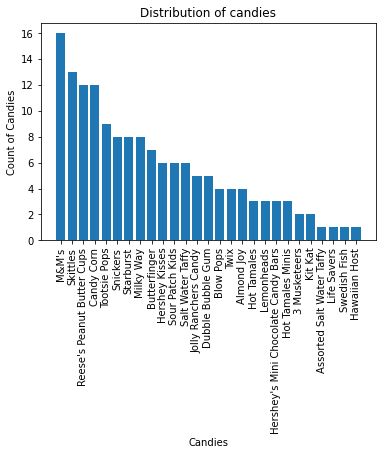

In [14]:
#Make a bar plot to show the number of times each candy appears in in the dataset (regardless of place).

Most_famous_candy_count = pd.DataFrame(Most_famous_candy,columns=['name', 'count'])

plt.bar(Most_famous_candy_count['name'], Most_famous_candy_count['count'])
plt.xlabel('Candies')
plt.xticks(rotation=90)
plt.ylabel('Count of Candies')
plt.title('Distribution of candies')

plt.show()

<AxesSubplot:>

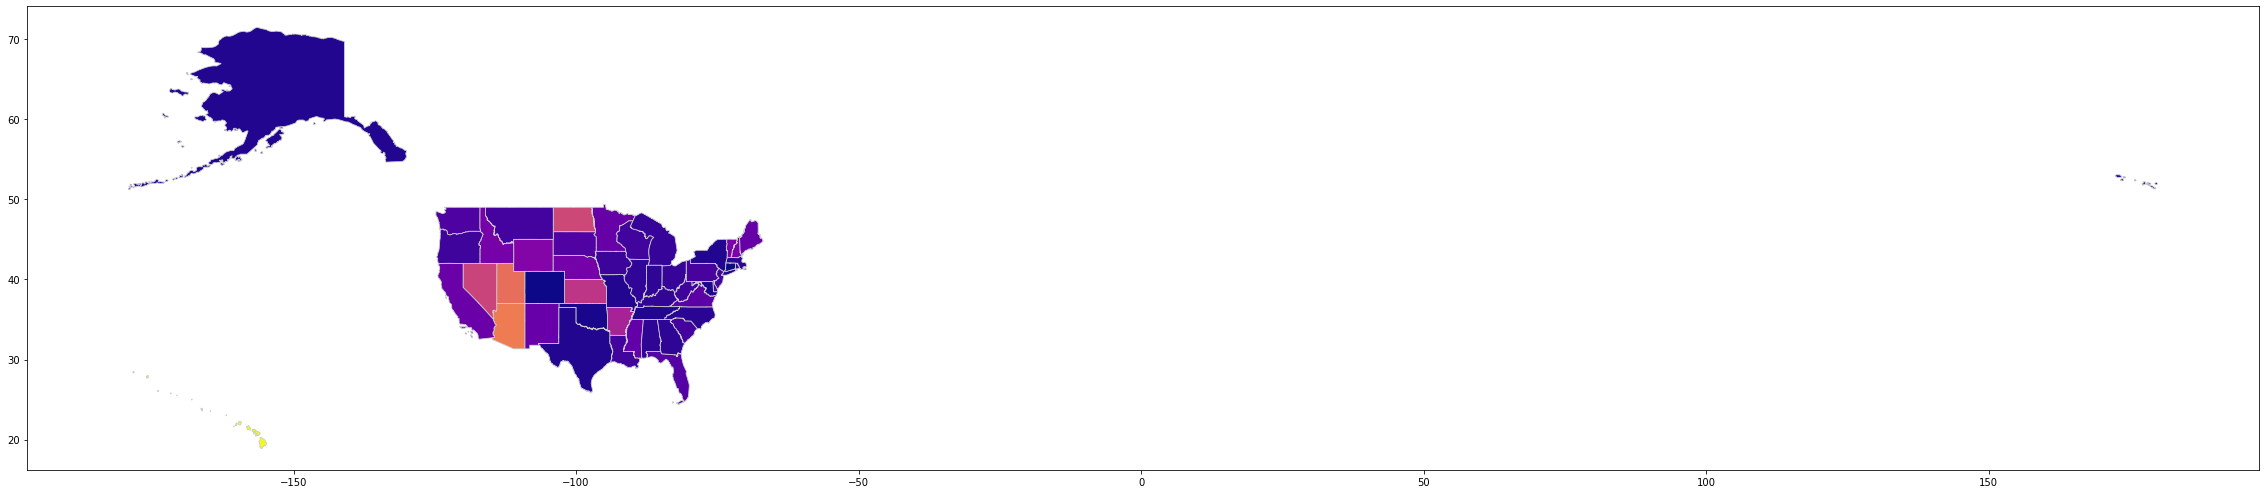

In [15]:
#plot a simple choropleth of candy consumption per capita for states.

fig, ax = plt.subplots(figsize=(40,10))
hallowen_candy_new.plot(column = 'per_capita', 
                    cmap = 'plasma', 
                    linewidth=0.8, 
                    ax=ax, 
                    edgecolor='0.8')
                    

NameError: name 'sns' is not defined

<Figure size 1440x576 with 0 Axes>